Database of Essential Genes (DEG) analysis needs:
- Expression data
- Gene annotation data
- Metadata regarding sample group or sample phenotype condition



In [1]:
getwd()

[1] "/home/sunzid/Research/24_LSU Brain"

In [ ]:
setwd("GSE63477/")
library(GEOquery)

In [3]:
my_id <- "GSE63477"
gse <- getGEO(my_id)

Found 1 file(s)

GSE63477_series_matrix.txt.gz



In [6]:
gse <- gse[[1]]
gse

In [9]:
pData(gse)[1:2,] ## print the sample information

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_institute,contact_address,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,cell line:ch1,treatment:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1550559,"LNCaP CTRL treated in charcoal dextran treated serum, replicate 1",GSM1550559,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550559/suppl/GSM1550559_01_LN_CDT-CTRL_1.CEL.gz,44629,LNCaP,CTRL treated in charcoal dextran treated serum
GSM1550560,"LNCaP CTRL treated in charcoal dextran treated serum, replicate 2",GSM1550560,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550560/suppl/GSM1550560_01_LN_CTS-CTRL_2.CEL.gz,44629,LNCaP,CTRL treated in charcoal dextran treated serum


In [10]:
fData(gse)[1,] ## print the gene annotation

,ID,RANGE_STRAND,RANGE_START,RANGE_END,total_probes,GB_ACC,SPOT_ID,RANGE_GB
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>
16657436,16657436,+,12190,13639,25,NR_046018,chr1:12190-13639,NC_000001.10


In [11]:
exprs(gse)[1,] ## print the expression data

GSM1550559 GSM1550560 GSM1550561 GSM1550562 GSM1550563 GSM1550564 GSM1550565 
  24.63215   21.96198   24.36674   24.28032   24.82574   22.72258   25.76430 
GSM1550566 GSM1550567 GSM1550568 GSM1550569 GSM1550570 
  23.03947   24.45452   23.74868   23.77131   21.67176

In [12]:
pData(gse)$data_processing[1]

[1] "Data were processed with GenSpring 11.5 software. The expression data were RMA normalized, and filtered to remove low-expressing genes."

In [13]:
# For visualisation and statistical analysis, we will inspect the data to 
# discover what scale the data are presented in. The methods we will use assume 
# the data are on a log2 scale; typically in the range of 0 to 16.

## have a look on the expression value
summary(exprs(gse))

   GSM1550559        GSM1550560        GSM1550561        GSM1550562     
 Min.   :  17.42   Min.   :  17.49   Min.   :  17.54   Min.   :  17.44  
 1st Qu.:  19.59   1st Qu.:  19.53   1st Qu.:  19.59   1st Qu.:  19.45  
 Median :  22.29   Median :  22.34   Median :  22.39   Median :  22.43  
 Mean   :  48.09   Mean   :  48.51   Mean   :  48.08   Mean   :  48.91  
 3rd Qu.:  33.45   3rd Qu.:  33.90   3rd Qu.:  33.70   3rd Qu.:  33.92  
 Max.   :5889.83   Max.   :6043.74   Max.   :5907.55   Max.   :6087.95  
   GSM1550563        GSM1550564        GSM1550565        GSM1550566     
 Min.   :  17.48   Min.   :  17.47   Min.   :  17.43   Min.   :  17.49  
 1st Qu.:  19.48   1st Qu.:  19.51   1st Qu.:  19.59   1st Qu.:  19.54  
 Median :  22.19   Median :  22.22   Median :  22.38   Median :  22.29  
 Mean   :  49.16   Mean   :  48.72   Mean   :  48.29   Mean   :  48.83  
 3rd Qu.:  33.70   3rd Qu.:  33.84   3rd Qu.:  33.49   3rd Qu.:  33.85  
 Max.   :5991.22   Max.   :5827.09   Max.   :5704.8

In [14]:
# From this output we clearly see that the values go beyond 16, 
# so we need to perform a log2 transformation.
exprs(gse) <- log2(exprs(gse))

# check again the summary
summary(exprs(gse))

   GSM1550559       GSM1550560       GSM1550561       GSM1550562    
 Min.   : 4.122   Min.   : 4.128   Min.   : 4.133   Min.   : 4.124  
 1st Qu.: 4.292   1st Qu.: 4.288   1st Qu.: 4.292   1st Qu.: 4.282  
 Median : 4.479   Median : 4.482   Median : 4.485   Median : 4.488  
 Mean   : 4.887   Mean   : 4.892   Mean   : 4.887   Mean   : 4.890  
 3rd Qu.: 5.064   3rd Qu.: 5.083   3rd Qu.: 5.075   3rd Qu.: 5.084  
 Max.   :12.524   Max.   :12.561   Max.   :12.528   Max.   :12.572  
   GSM1550563       GSM1550564       GSM1550565       GSM1550566    
 Min.   : 4.128   Min.   : 4.127   Min.   : 4.123   Min.   : 4.128  
 1st Qu.: 4.284   1st Qu.: 4.286   1st Qu.: 4.292   1st Qu.: 4.288  
 Median : 4.472   Median : 4.474   Median : 4.484   Median : 4.478  
 Mean   : 4.893   Mean   : 4.892   Mean   : 4.887   Mean   : 4.892  
 3rd Qu.: 5.075   3rd Qu.: 5.081   3rd Qu.: 5.066   3rd Qu.: 5.081  
 Max.   :12.549   Max.   :12.509   Max.   :12.478   Max.   :12.536  
   GSM1550567       GSM1550568    

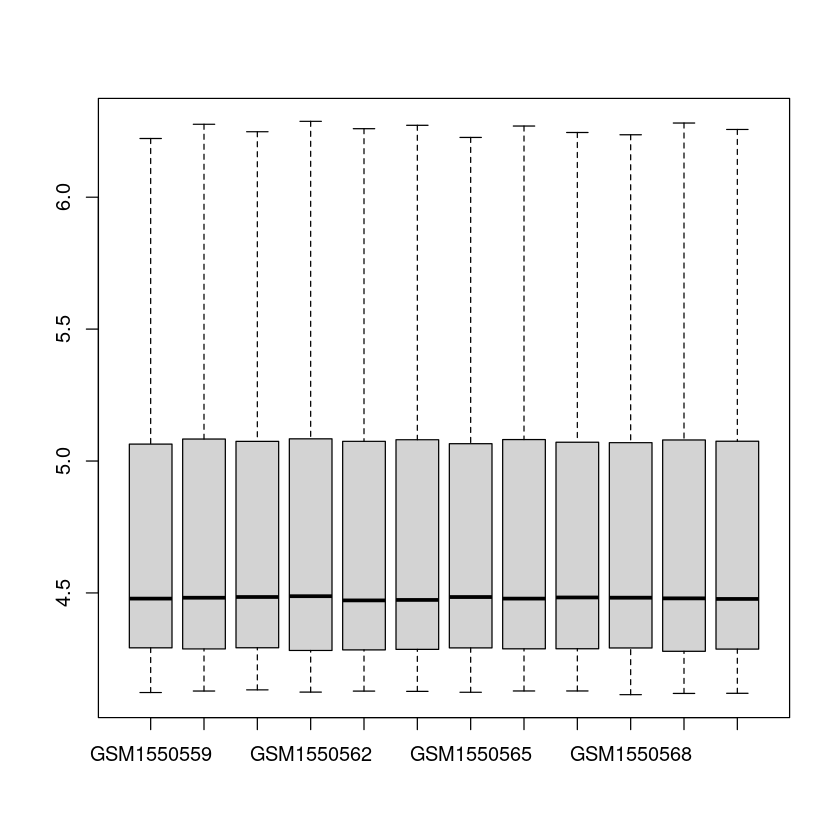

In [15]:
boxplot(exprs(gse),outline=F)